# **4. Analyze**

---

## **4.1 Prerequisites**



**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [3]:
df = pd.read_csv('clean_lichess_games.csv', encoding = 'utf-8')
df

,Unnamed: 0,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply,game_category,white level,black level,Rating_Diff,Quality,winner condition,base_time,increment_time
0,0,False,13,outoftime,white,bourgris,1500,a-00,1191,D10,Slav Defense,5,rapid,Beginner,Beginner,309,Medium Quality,higher rating,15,2
1,1,True,16,resign,black,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense,4,blitz,Beginner,Beginner,61,High Quality,lower rating,5,10
2,2,True,61,mate,white,ischia,1496,a-00,1500,C20,King's Pawn Game,3,blitz,Beginner,Beginner,4,High Quality,higher rating,5,10
3,3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game,3,rapid,Beginner,Beginner,15,High Quality,higher rating,20,0
4,4,True,95,mate,white,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5,rapid,Beginner,Beginner,54,High Quality,higher rating,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,20053,True,24,resign,white,belcolt,1691,jamboger,1220,A80,Dutch Defense,2,rapid,Intermediate,Beginner,471,Low Quality,higher rating,10,10
19109,20054,True,82,mate,black,jamboger,1233,farrukhasomiddinov,1196,A41,Queen's Pawn,2,rapid,Beginner,Beginner,37,High Quality,lower rating,10,0
19110,20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game,3,rapid,Beginner,Beginner,67,High Quality,higher rating,10,0
19111,20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,4,rapid,Beginner,Beginner,133,High Quality,higher rating,10,0


## **4.2 Answer questions**

**Question 3: Is there a difference in the performance of players across different openings when analyzed by rating groups?**

Initially, we define performance as **number of win games / total games**

**Step 1**: Get the top 10 most popular **opening_names**.

**Step 2**: Group the data by white level and opening name to calculate performance.

**Step 3**: Ensure all levels have the same top 10 opening names by filling missing ones with zeros.

**Step 4**: Calculate performance metrics (win, loss, draw rates) for each opening in each white level.

**Step 5**: Visualize the performance for each white level using bar charts.

In [4]:
top_openings = df['opening_name'].value_counts().head(10).index
white_levels = df['white level'].unique()

filtered_data = df[df['opening_name'].isin(top_openings)]


performance_by_level = (
    filtered_data.groupby(['white level', 'opening_name', 'winner'])
    .size()
    .unstack()
    .fillna(0)
    .astype('int')
)

performance_by_level['total_games'] = performance_by_level.sum(axis=1)
performance_by_level['white_win_rate'] = performance_by_level['white'] / performance_by_level['total_games']
performance_by_level['black_win_rate'] = performance_by_level['black'] / performance_by_level['total_games']
performance_by_level['draw_rate'] = performance_by_level['draw'] / performance_by_level['total_games']


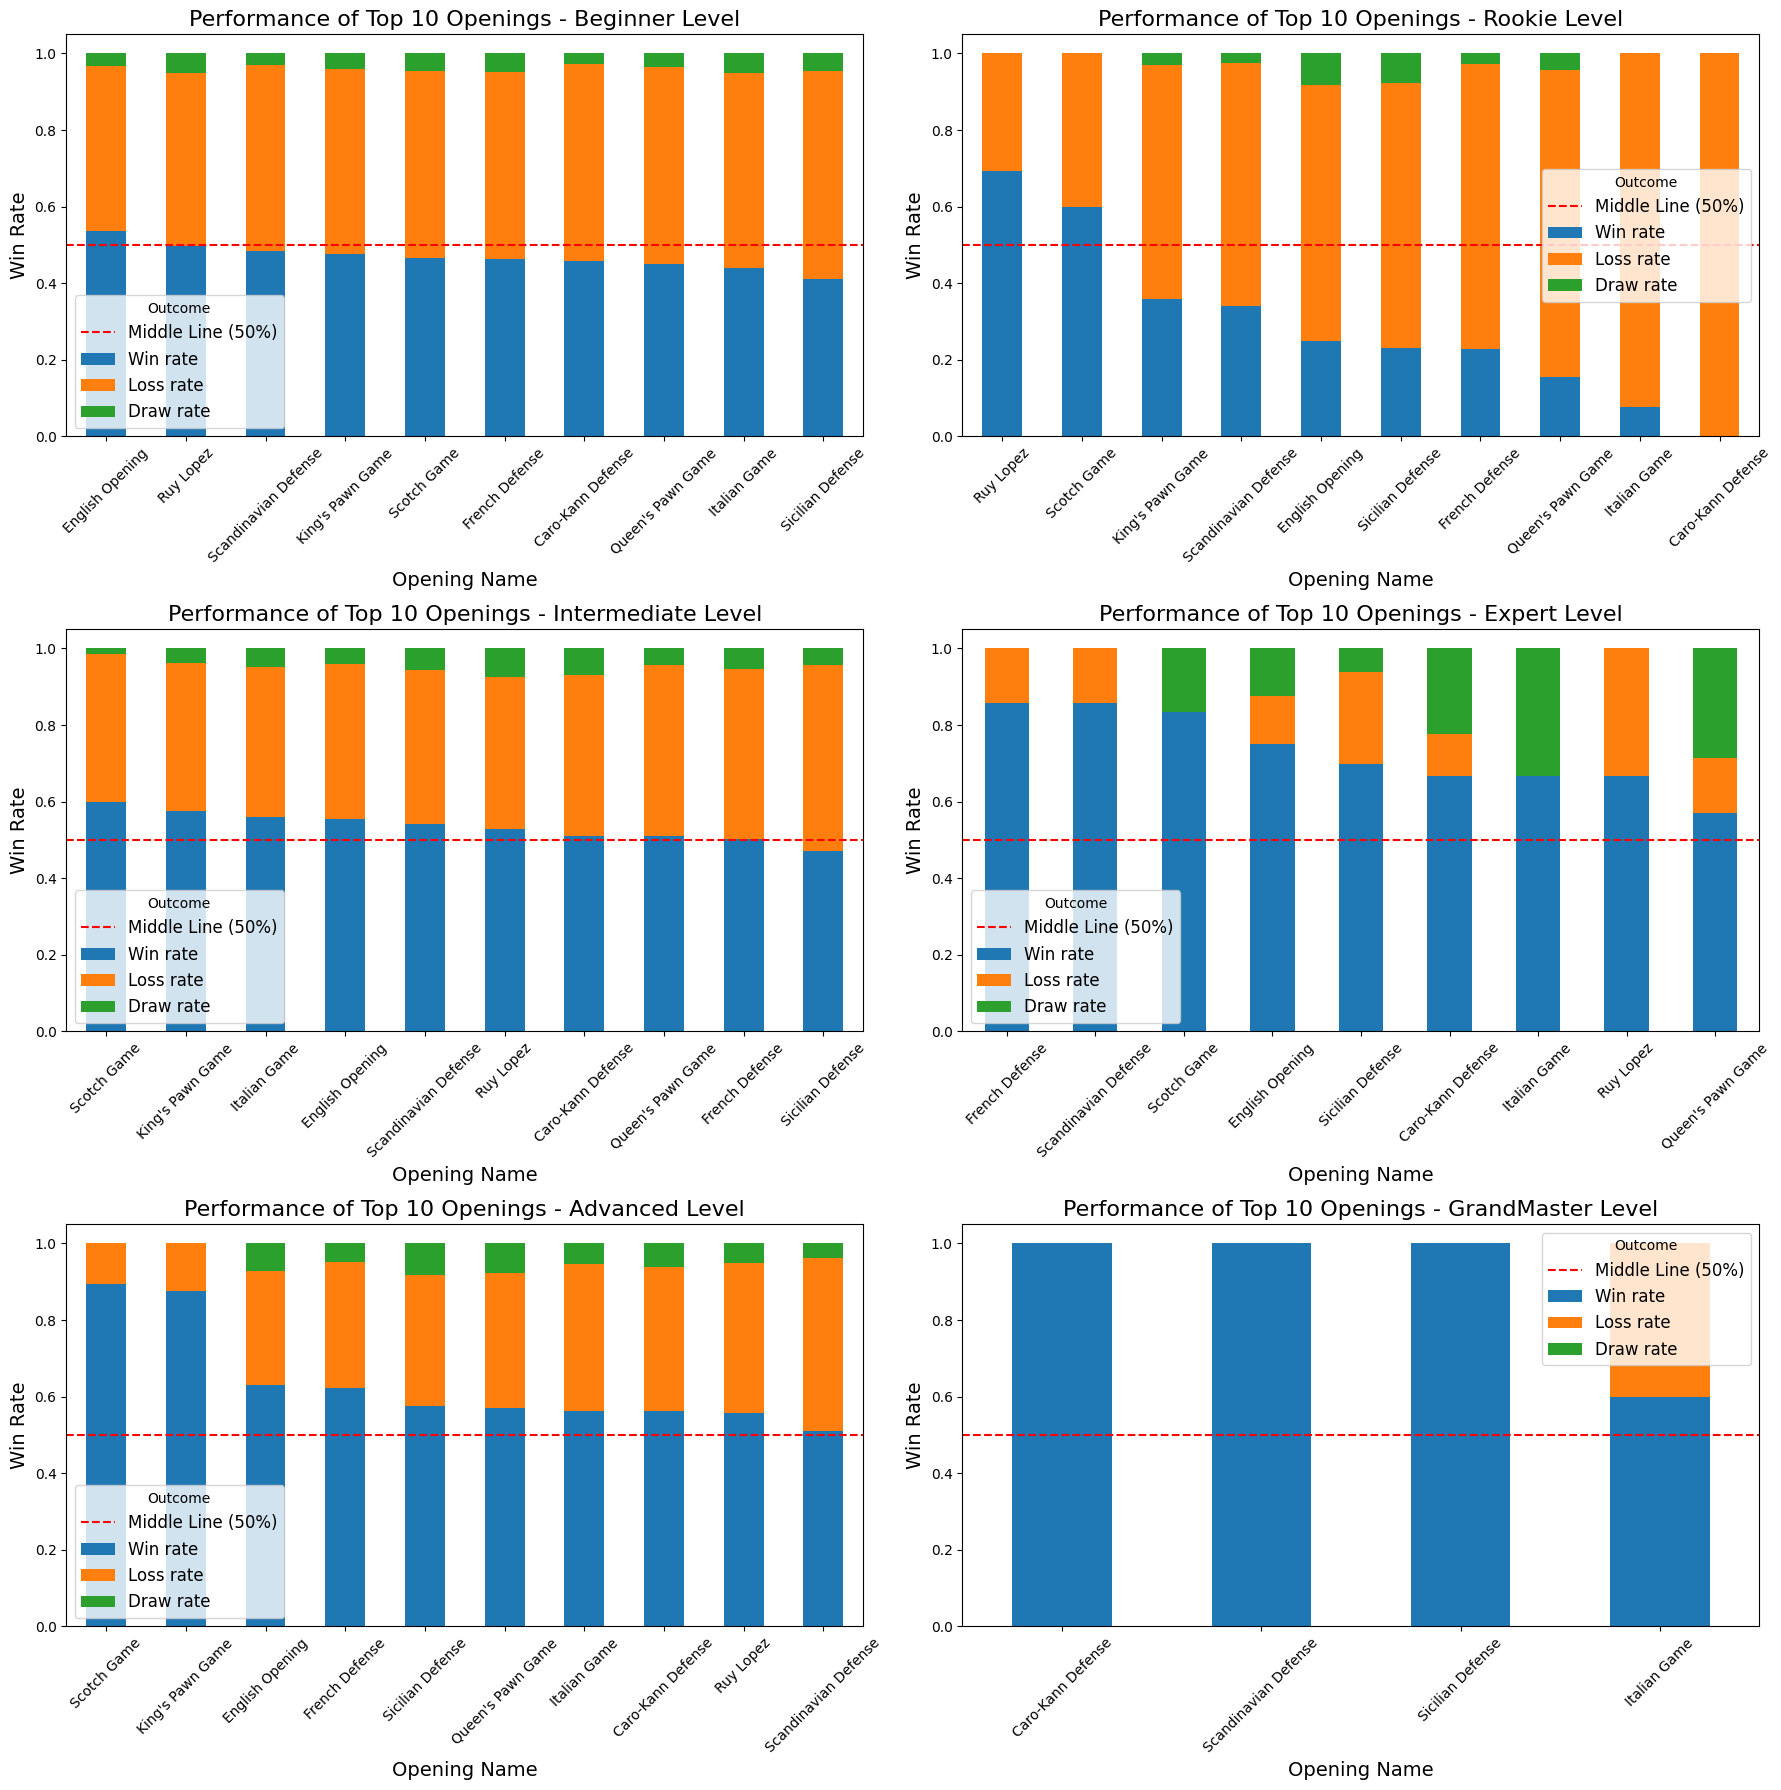

In [5]:


fig, axes = plt.subplots(3, 2, figsize=(18, 6 * 3))

axes = axes.flatten()

for idx, level in enumerate(white_levels):
    level_data = performance_by_level.loc[level]
    
    level_data_sorted = level_data.sort_values('white_win_rate', ascending=False)
    
    level_data_sorted[['white_win_rate', 'black_win_rate', 'draw_rate']].plot(
        kind='bar', 
        stacked=True, 
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
        ax=axes[idx]
    )
    axes[idx].hlines(y=0.5, xmin=-0.5, xmax=len(level_data_sorted) - 0.5, colors='red', linestyles='dashed', label='Middle Line (50%)')
    
    axes[idx].set_title(f'Performance of Top 10 Openings - {level} Level', fontsize=16)
    axes[idx].set_xlabel('Opening Name', fontsize=14)
    axes[idx].set_ylabel('Win Rate', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(['Middle Line (50%)', 'Win rate', 'Loss rate', 'Draw rate'], title='Outcome', fontsize=12)

plt.tight_layout()
plt.show()

**Observation**

- Overall, **Beginner** and **Intermediate** players exhibit similar win rates across different opening names, albeit with low variation:
  - **Beginner Level**: The **English Opening** and **Ruy Lopez** have the highest win rates, each hovering around 50%, while the **Sicilian Defense** has the lowest win rate, below 50%.
  - **Intermediate Level**: Similarly, this level also sees the **Sicilian Defense** with the lowest win rate, at approximately 50%. In contrast, the **Scotch Game** and **King's Pawn Game** achieve the highest figures, nearly 60%.

- **Rookie**, **Expert**, and **Advanced** players demonstrate much more variation in their win rate proportions compared to the Beginner and Intermediate levels:
  - **Rookie Level**: The **Ruy Lopez** and **Scotch Game** have the highest win rates, at 70% and 60%, respectively. Meanwhile, the **Caro-Kann Defense** sits at the bottom of the chart with a 0% win rate.
  - **Expert Level**: The **French Defense**, **Scandinavian Defense**, and **Scotch Game** boast the highest win rates, each exceeding 80%. On the other hand, the **Queen's Pawn Game** has the lowest figure, at roughly 60%.
  - **Advanced Level**: The **Scotch Game** and **King's Pawn Game** top the chart with win rates approaching 90%, while the **Scandinavian Defense** records the lowest figure, at 50%.

- **Grandmaster** players stand out with only four popular opening names, whose figures are significantly different compared to other levels. The **Caro-Kann Defense**, **Scandinavian Defense**, and **Sicilian Defense** dominate with a perfect 100% win rate, while the **Italian Game** achieves a 60% win rate.



**Insights**

*1. Openings Shape Win Rates More at Higher Levels*
- For **Beginner** and **Intermediate** players, win rates across openings show minimal variation. This indicates that at these levels, outcomes depend more on general chess ability rather than opening choices.
- In contrast, **Rookie**, **Expert**, and **Advanced** players show a marked difference in win rates across openings, highlighting the increasing importance of mastering specific openings as players progress.

*2. Complex Openings Can Hinder Early Development*
- Openings like the **Sicilian Defense** consistently underperform for **Beginners** and **Intermediates**, suggesting that complex openings may overwhelm less experienced players. Avoiding such openings early on can help players focus on foundational skills.
- Similarly, the **Caro-Kann Defense** shows a 0% win rate at the **Rookie Level**, reinforcing that some defensive openings might not align with the capabilities of developing players.
  
*3. Certain Openings Consistently Excel*
- The **Ruy Lopez** and **Scotch Game** are standout performers across multiple levels, particularly for **Rookies** (70% win rate for Ruy Lopez) and **Experts** (80%+ win rate for Scotch Game). These openings may be easier to learn and offer strong strategic opportunities, making them ideal for players transitioning between skill levels.

*4. Grandmasters Optimize for Perfection*
- At the **Grandmaster** Level, only four openings are used, with three of them (**Caro-Kann Defense**, **Scandinavian Defense**, and **Sicilian Defense**) achieving a flawless 100% win rate. This demonstrates that elite players focus on deeply studied openings with proven success, favoring precision over variety.
Their success with the **Sicilian Defense** suggests that it is highly effective when used by experts, despite being challenging for beginners.

*5. Pathway for Improvement*
- **Beginner** and **Intermediate** players should focus on simpler, high-performing openings such as the **Ruy Lopez** and **King's Pawn Game** to build confidence and foundational skills.
- **Advanced** players can expand their repertoire to include more nuanced openings, such as the **French Defense** and **Scandinavian Defense**, which offer strategic depth but require mastery.

*6. The Role of Simplicity and Mastery*
- Openings with straightforward strategic plans, like the **Scotch Game**, achieve consistent success across all levels. This underscores the value of simplicity and repeated practice in achieving better outcomes, especially as players progress.

**Question 4: Do highly rated players tend to win faster (fewer moves) than lower-rated players?**

Analyze the relationship between player ratings (e.g., white and black ratings) and the number of moves (turns) taken for a win.
Define "highly rated" and "lower-rated" players (e.g., based on a threshold or comparison to the average rating).
Use statistical methods or visualizations (e.g., correlation, regression, or grouped comparisons) to determine if there is a trend.

    white level      turns
0      Advanced  66.690207
1      Beginner  57.352213
2        Expert  60.371429
3   GrandMaster  48.370370
4  Intermediate  64.714306
5        Rookie  48.447489
    black level      turns
0      Advanced  67.635710
1      Beginner  57.017591
2        Expert  65.006410
3   GrandMaster  61.687500
4  Intermediate  65.112605
5        Rookie  47.613128


C:\Users\lxtha\AppData\Local\Temp\ipykernel_3856\2407609595.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='white level', y='turns', palette='Set2', order=sorted(df['white level'].unique()))


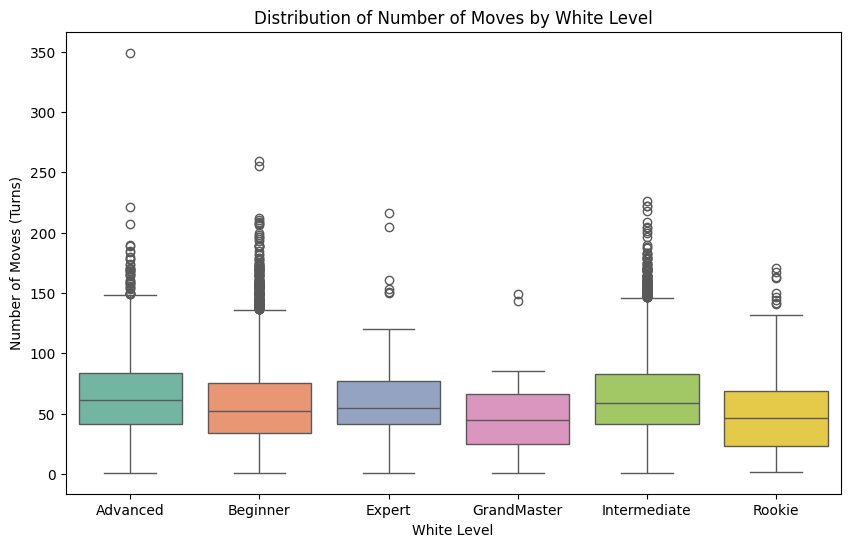

C:\Users\lxtha\AppData\Local\Temp\ipykernel_3856\2407609595.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turns_by_white_level, x='white level', y='turns', palette='Set3', order=sorted(turns_by_white_level['white level']))


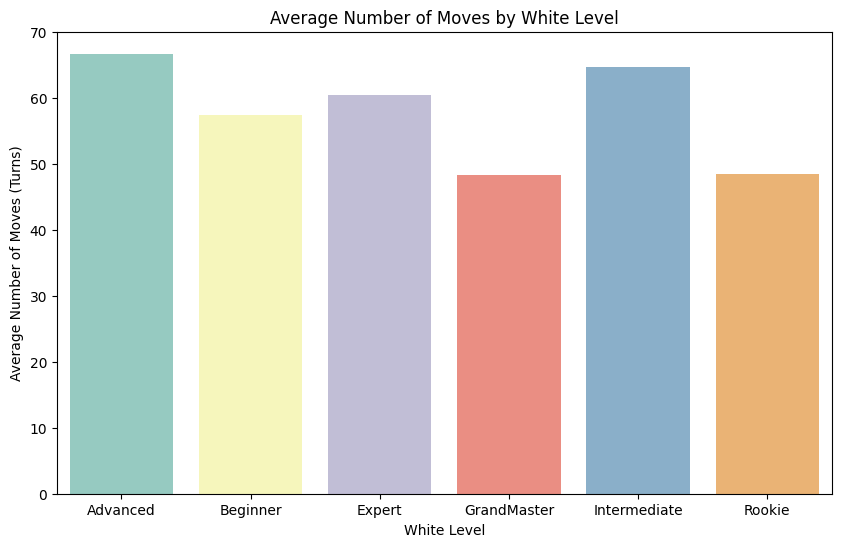

C:\Users\lxtha\AppData\Local\Temp\ipykernel_3856\2407609595.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='white level', y='turns', palette='Set2', order=sorted(df['white level'].unique()))


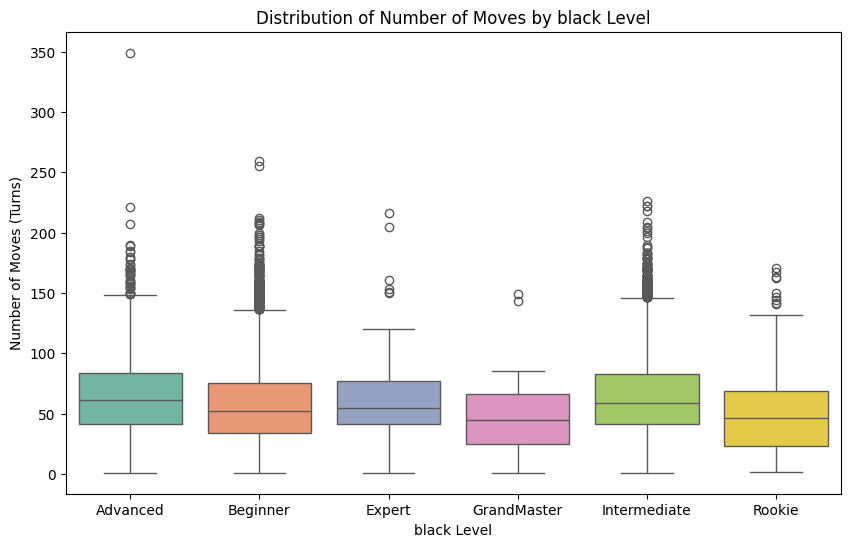

C:\Users\lxtha\AppData\Local\Temp\ipykernel_3856\2407609595.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=turns_by_black_level, x='black level', y='turns', palette='Set3', order=sorted(turns_by_black_level['black level']))


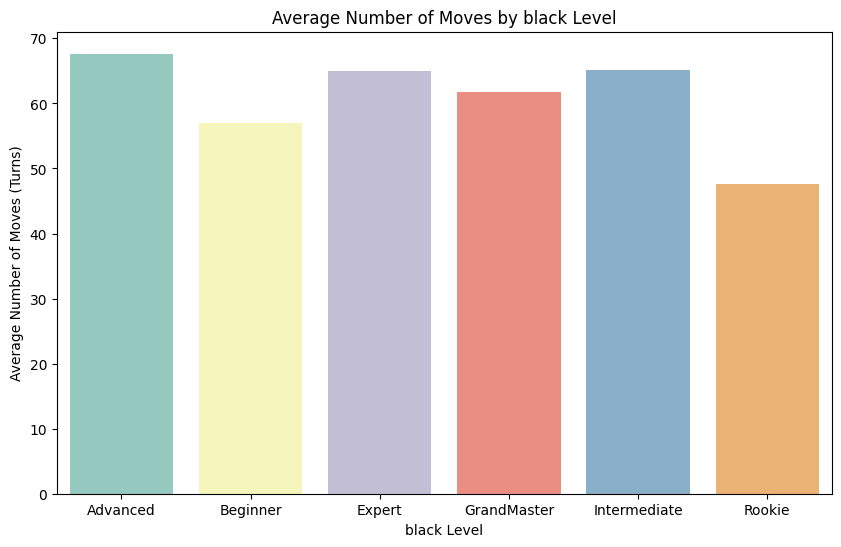

In [7]:
turns_by_white_level = df.groupby('white level')['turns'].mean().reset_index()
turns_by_black_level = df.groupby('black level')['turns'].mean().reset_index()

print(turns_by_white_level)
print(turns_by_black_level)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='white level', y='turns', palette='Set2', order=sorted(df['white level'].unique()))
plt.title("Distribution of Number of Moves by White Level")
plt.xlabel("White Level")
plt.ylabel("Number of Moves (Turns)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=turns_by_white_level, x='white level', y='turns', palette='Set3', order=sorted(turns_by_white_level['white level']))
plt.title("Average Number of Moves by White Level")
plt.xlabel("White Level")
plt.ylabel("Average Number of Moves (Turns)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='white level', y='turns', palette='Set2', order=sorted(df['white level'].unique()))
plt.title("Distribution of Number of Moves by black Level")
plt.xlabel("black Level")
plt.ylabel("Number of Moves (Turns)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=turns_by_black_level, x='black level', y='turns', palette='Set3', order=sorted(turns_by_black_level['black level']))
plt.title("Average Number of Moves by black Level")
plt.xlabel("black Level")
plt.ylabel("Average Number of Moves (Turns)")
plt.show()


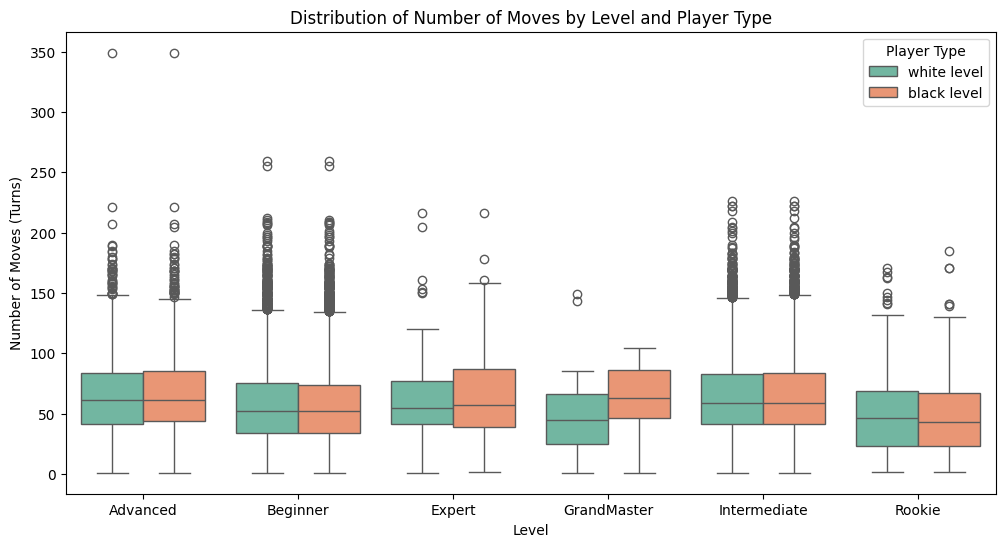

In [8]:
df_melted = df.melt(
    id_vars=['turns'], 
    value_vars=['white level', 'black level'], 
    var_name='player_type', 
    value_name='level'
)

# Box plot for distribution of moves by level and player type
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_melted, 
    x='level', 
    y='turns', 
    hue='player_type', 
    palette='Set2', 
    order=sorted(df_melted['level'].unique())
)
plt.title("Distribution of Number of Moves by Level and Player Type")
plt.xlabel("Level")
plt.ylabel("Number of Moves (Turns)")
plt.legend(title="Player Type")
plt.show()